In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
heart = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\data\heart.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


    Demographic
        Sex: male or female(Nominal)
        Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept  of age is continuous)
    
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as  one can have any number of cigarettes, even half a cigarette.)
    
    Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
    
    Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous- In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

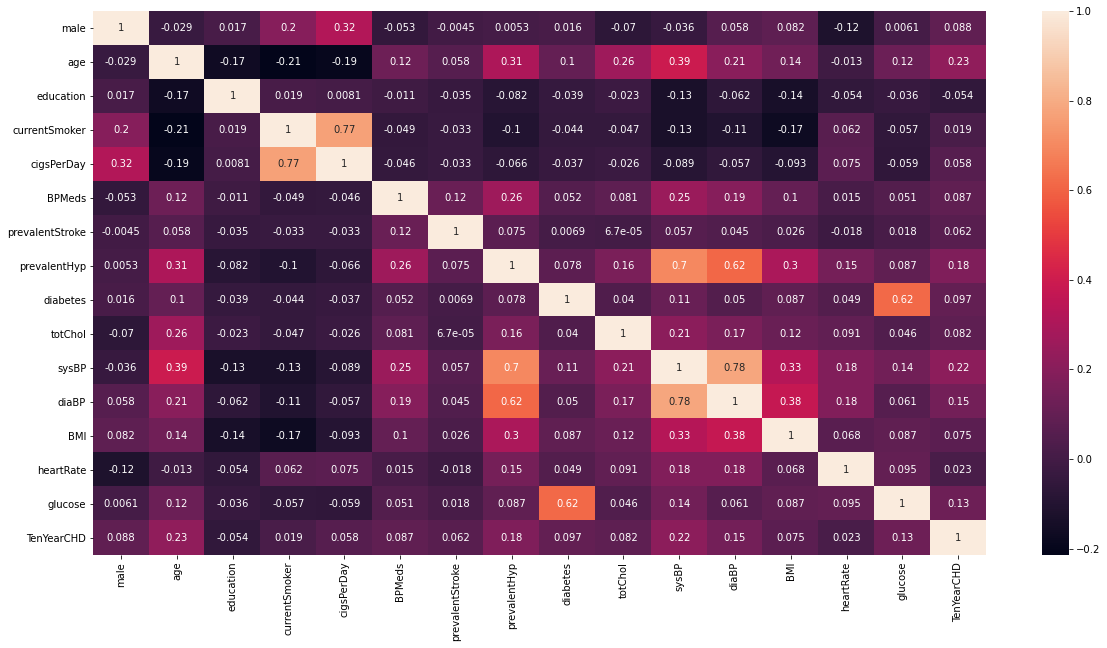

In [4]:
plt.figure(figsize = (20,10))       
sns.heatmap(heart.corr(),annot = True)
plt.show()

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
heart.shape

(4238, 16)

In [8]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
heart["education"].fillna(0, inplace=True)

In [10]:
df1 = heart.loc[heart.currentSmoker == 0]
#print(heart.isnull().sum())
df1.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              30
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             19
sysBP                0
diaBP                0
BMI                 12
heartRate            0
glucose            183
TenYearCHD           0
dtype: int64

In [11]:
m = heart['cigsPerDay'].mode()
m

0    0.0
dtype: float64

In [12]:
heart['cigsPerDay'].fillna(heart['cigsPerDay'].mean(), inplace=True)

In [13]:
heart.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
heart['BPMeds'].describe()

count    4185.000000
mean        0.029630
std         0.169584
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [15]:
df = heart.loc[(heart.heartRate < 60) | (heart.heartRate >100)]
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds              2
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             1
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose            37
TenYearCHD          0
dtype: int64

In [16]:
df[df.BPMeds != df.BPMeds]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
769,0,37,3.0,0,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0
1044,0,65,1.0,0,0.0,NaN,1,1,0,290.0,144.0,64.0,21.41,58.0,145.0,1


In [17]:
heart.at[1044,'BPMeds'] = 1
heart.at[769,'BPMeds'] = 0

In [18]:
heart.BPMeds.fillna(0, inplace=True)

In [19]:
heart.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
heart.totChol.describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [21]:
m = heart.totChol.mode()
heart.totChol.fillna(m[0], inplace=True)

In [22]:
heart[heart.heartRate != heart.heartRate]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1.0,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


In [23]:
m = heart.heartRate.mode()
heart.heartRate.fillna(m[0], inplace=True)

In [24]:
m = heart.BMI.mode()
heart.BMI.fillna(m[0], inplace=True)

In [25]:
m = heart.glucose.mode()
heart.glucose.fillna(m[0], inplace=True)

In [26]:
heart.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.929920,0.494101,9.003089,0.029495,0.005899,0.310524,0.025720,236.760264,132.352407,82.893464,25.785814,75.878716,81.328929,0.151958
std,0.495022,8.572160,1.053018,0.500024,11.879230,0.169209,0.076587,0.462763,0.158316,44.327866,22.038097,11.910850,4.078100,12.025185,22.924837,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.050000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [28]:
heart = heart.astype({'BPMeds': 'int64', 'cigsPerDay': 'int64', 'heartRate': 'int64'})
heart['BPMeds'].dtype ,heart['cigsPerDay'].dtype ,heart['heartRate'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
heart = heart.drop('education',axis=1)
heart = heart.drop('currentSmoker',axis=1)

In [31]:
X = heart.drop('TenYearCHD', axis=1 )
X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80,77.0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95,76.0
2,1,48,20,0,0,0,0,245.0,127.5,80.0,25.34,75,70.0
3,0,61,30,0,0,1,0,225.0,150.0,95.0,28.58,65,103.0
4,0,46,23,0,0,0,0,285.0,130.0,84.0,23.10,85,85.0


In [32]:
y= heart['TenYearCHD']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
heart.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80,77.0,0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95,76.0,0
2,1,48,20,0,0,0,0,245.0,127.5,80.0,25.34,75,70.0,0
3,0,61,30,0,0,1,0,225.0,150.0,95.0,28.58,65,103.0,1
4,0,46,23,0,0,0,0,285.0,130.0,84.0,23.10,85,85.0,0


In [34]:
scaler = StandardScaler()

X[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(X[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

X.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.234951,-0.757973,0,0,0,0,-0.942188,-1.195907,-1.082625,0.290411,0.342761,-0.188854
1,0,-0.418257,-0.757973,0,0,0,0,0.298713,-0.515187,-0.158988,0.722036,1.590291,-0.232480
2,1,-0.184916,0.925837,0,0,0,0,0.185904,-0.220209,-0.242955,-0.109332,-0.073082,-0.494235
3,0,1.331800,1.767742,0,0,1,0,-0.265333,0.800871,1.016549,0.685249,-0.904768,0.945421
4,0,-0.418257,1.178408,0,0,0,0,1.088377,-0.106755,0.092912,-0.658672,0.758605,0.160154


In [35]:
heart_attack = (sum(heart['TenYearCHD'])/len(heart['TenYearCHD'].index))*100
heart_attack 

15.19584709768759

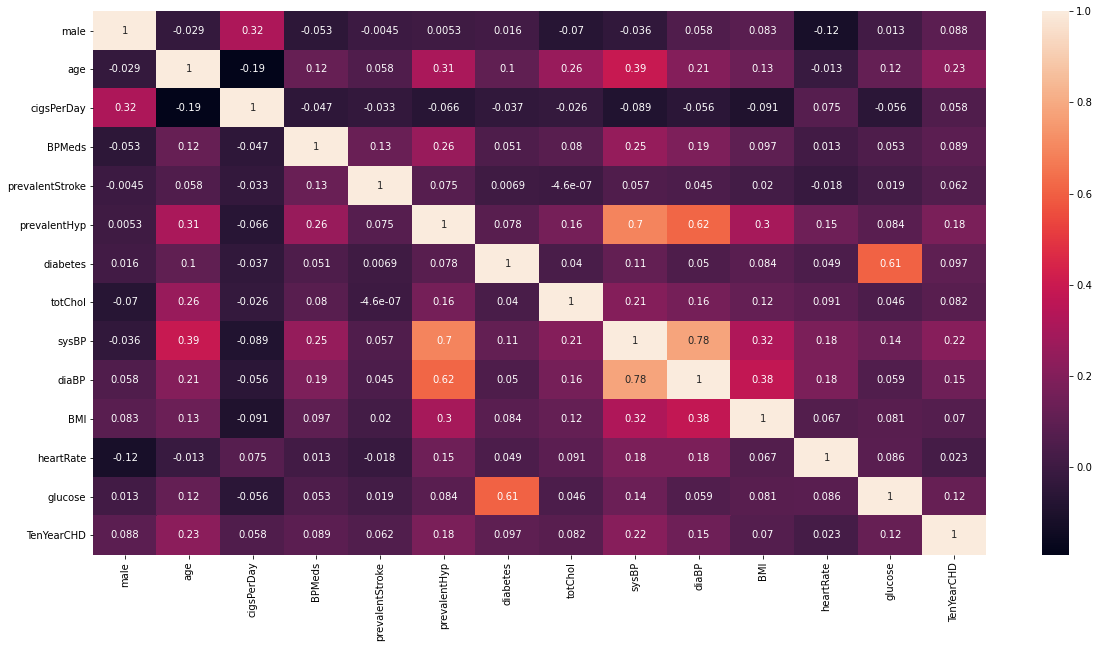

In [36]:
plt.figure(figsize = (20,10))       
sns.heatmap(heart.corr(),annot = True)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
dt_gini = DecisionTreeClassifier(criterion = "gini",random_state = 42)
dt_en = DecisionTreeClassifier(criterion = "entropy",random_state = 42)

In [39]:
dt_gini.fit(X_train, y_train)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred = dt_gini.predict(X_test)
y_pred1 = dt_en.predict(X_test)

In [41]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1106
           1       0.24      0.29      0.26       166

    accuracy                           0.79      1272
   macro avg       0.56      0.58      0.57      1272
weighted avg       0.81      0.79      0.80      1272



In [42]:
print("Classification report - \n", classification_report(y_test,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1106
           1       0.19      0.28      0.23       166

    accuracy                           0.76      1272
   macro avg       0.54      0.55      0.54      1272
weighted avg       0.79      0.76      0.77      1272



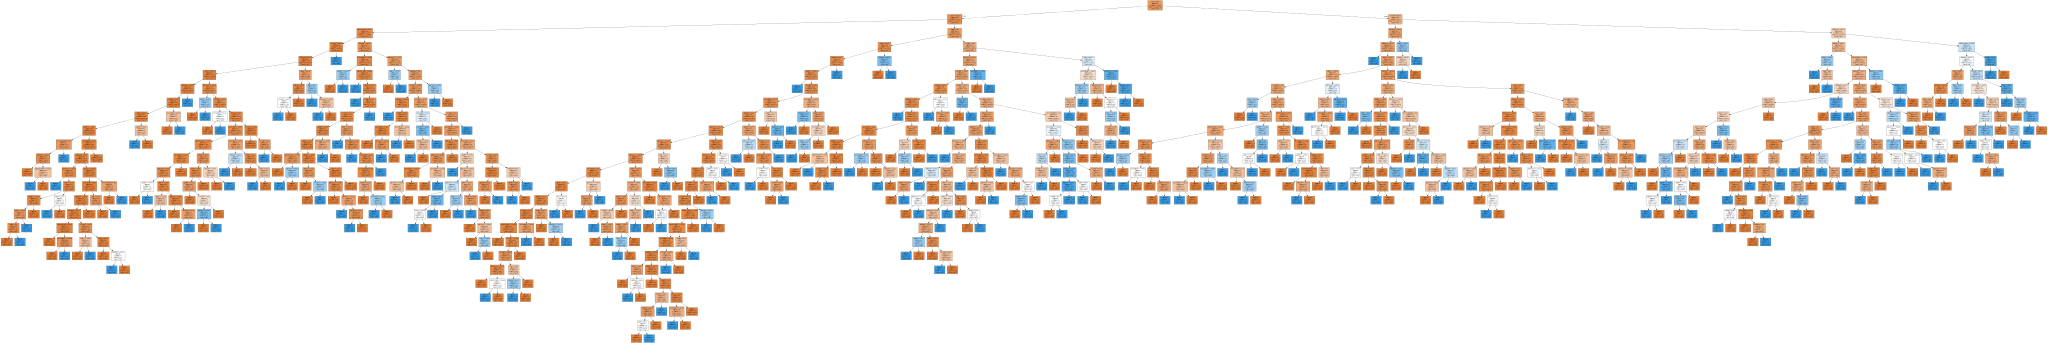

In [43]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dt_gini, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Yes", "No"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
params = {'criterion':["gini","entropy"], "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5,7,9,10] }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="f1_macro",verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 7, 9, 10],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='f1_macro', verbose=1)

In [45]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [46]:
grid_search_cv = grid_search_cv.best_estimator_

In [47]:
y_pred = grid_search_cv.predict(X_test)

In [48]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1106
           1       0.28      0.28      0.28       166

    accuracy                           0.81      1272
   macro avg       0.59      0.59      0.59      1272
weighted avg       0.81      0.81      0.81      1272



In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8136792452830188

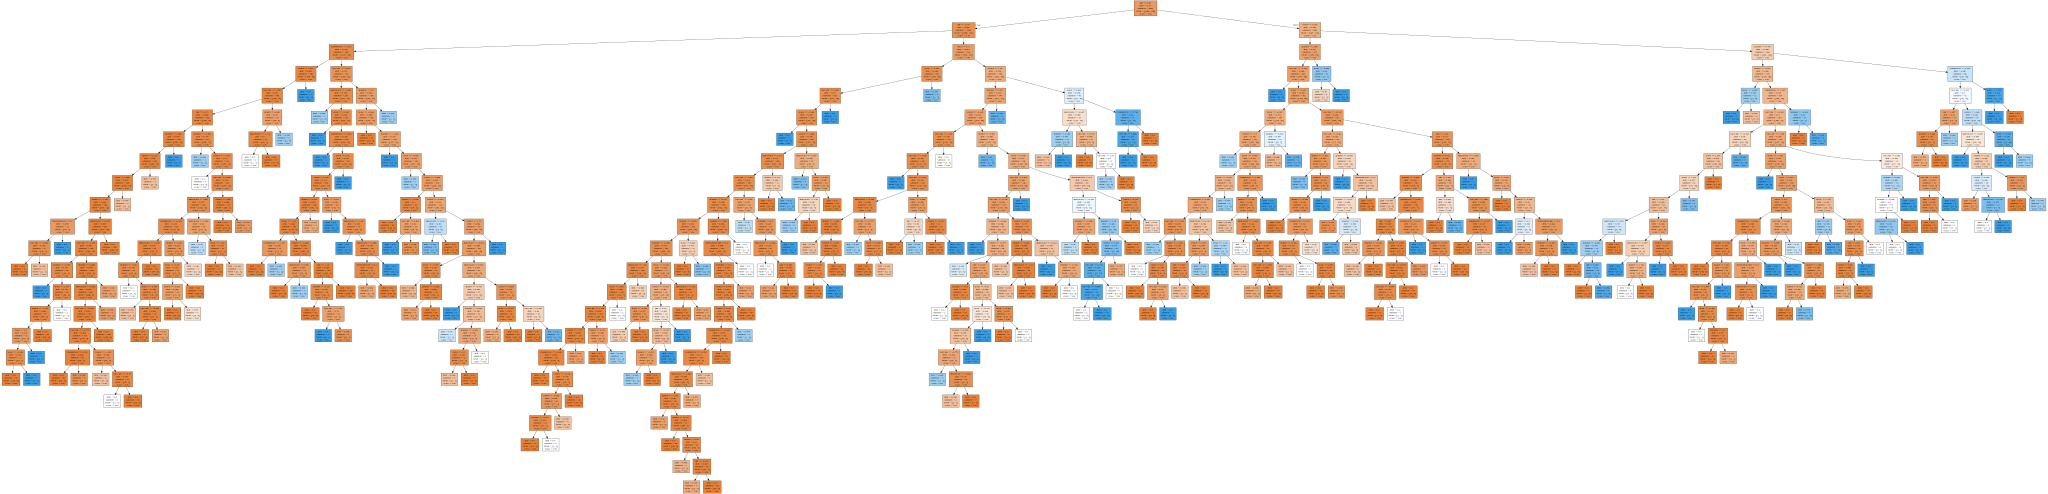

In [50]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(grid_search_cv, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Yes", "No"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [51]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]



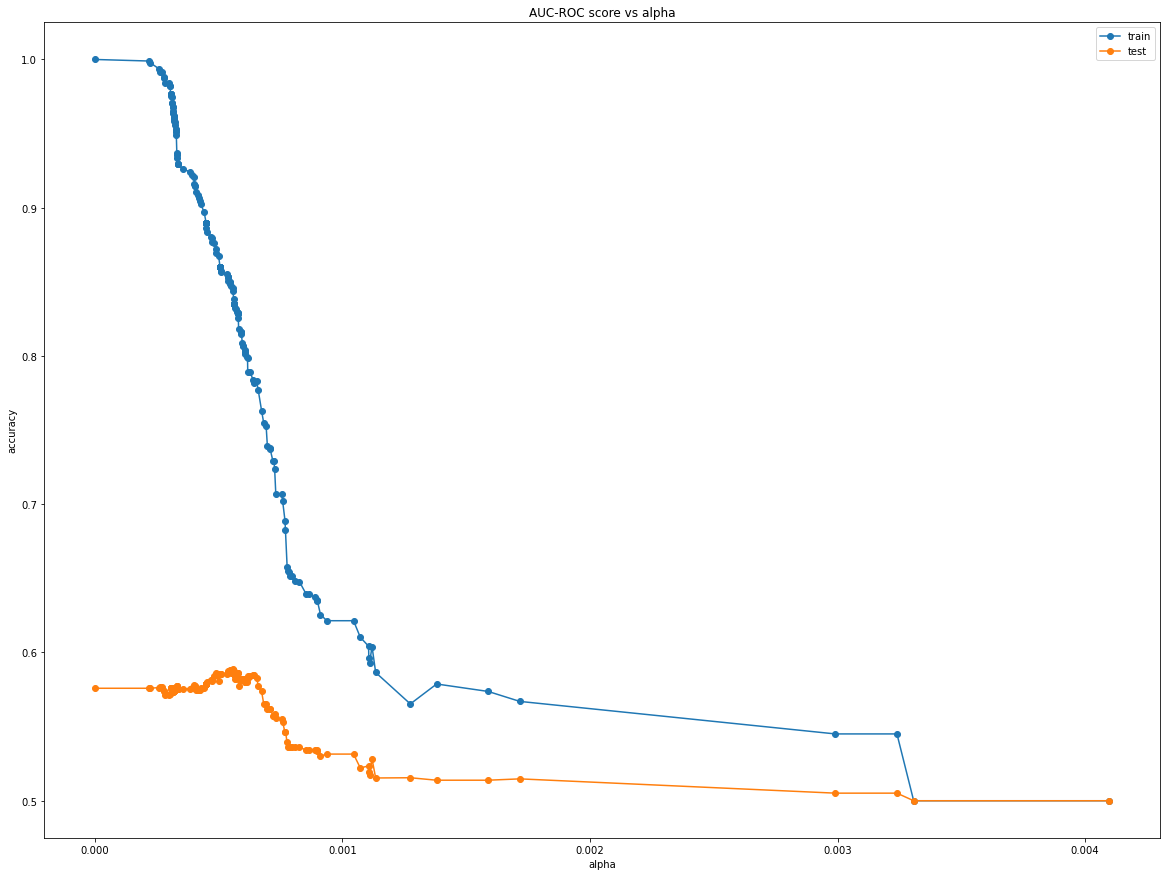

<Figure size 1440x1440 with 0 Axes>

In [52]:

fig, ax = plt.subplots(figsize = (20,15))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [68]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0008)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0008, random_state=42)

In [69]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8482704402515723

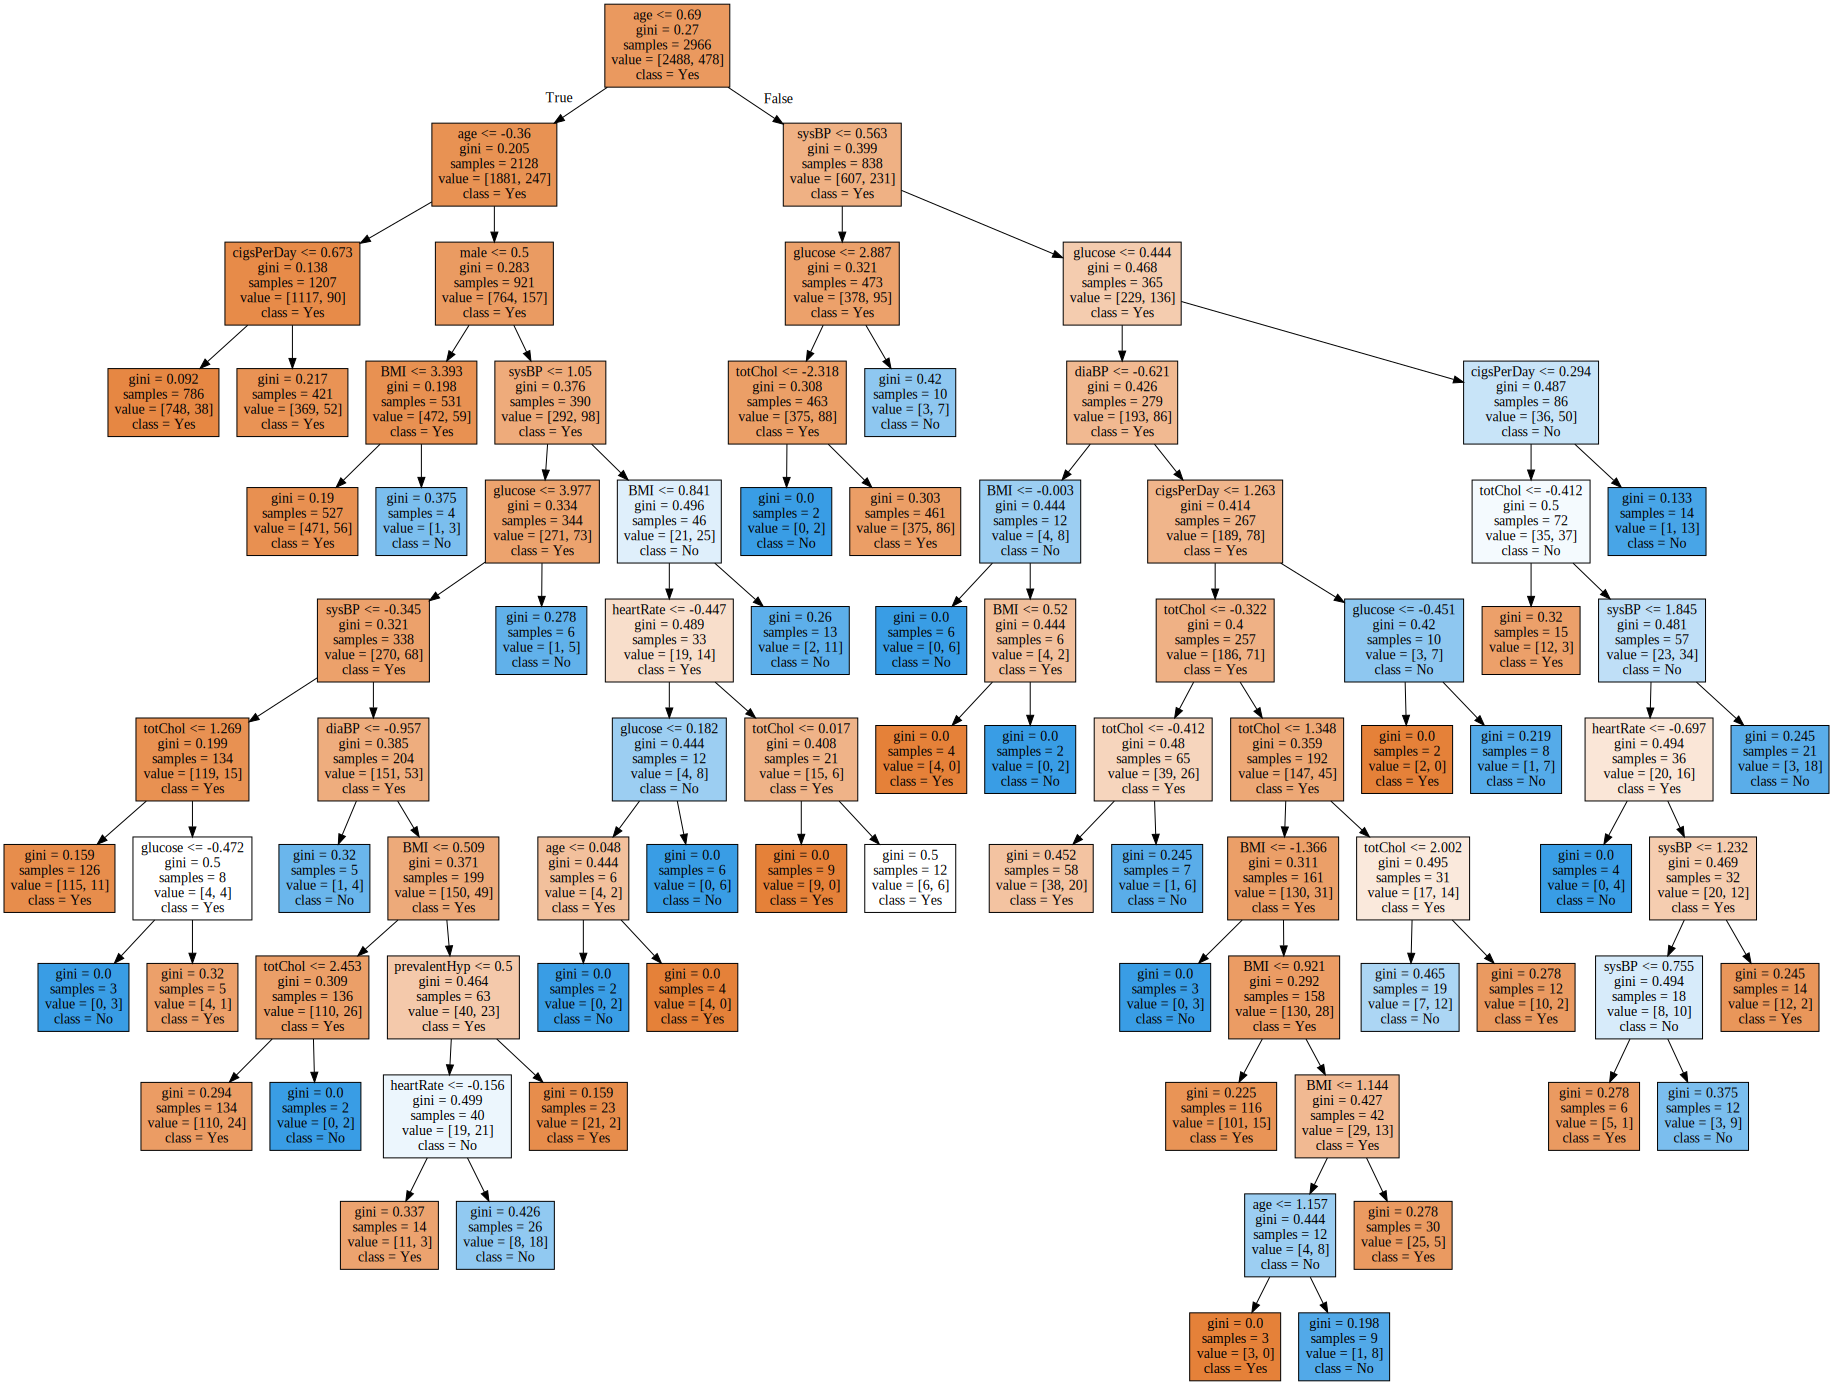

In [70]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Yes", "No"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph